In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [2]:
class_name=['8x shampoo','Dove','Head & shoulder',"L'oreal",'Mamaearth','P&G','Saslic','Wow skincare']

In [3]:
train_data=ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2 ,#streching image
    zoom_range=0.2,
    horizontal_flip=True #changes columns and rows
)

In [4]:
training_set=train_data.flow_from_directory(
    r'C:\Users\comp\Desktop\Deep\Pirates Alert\training',
    target_size=(200,200), 
    classes=class_name,
    class_mode='categorical'
                                           )

Found 155 images belonging to 8 classes.


In [5]:
model=Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#it is pool size declared 2 *2 pixel
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(8,activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 128)               9

In [7]:
opt=RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
#optimizer is used to reduce loss by changing weights, loss difference between actual and predicted 

C:\Users\comp\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [8]:
model.fit(training_set,
         epochs=10)

Epoch 1/10
5/5 [==============================] - 4s 636ms/step - loss: 16.1544 - accuracy: 0.1742
Epoch 2/10
5/5 [==============================] - 3s 625ms/step - loss: 2.1707 - accuracy: 0.2581
Epoch 3/10
5/5 [==============================] - 4s 712ms/step - loss: 1.6923 - accuracy: 0.4774
Epoch 4/10
5/5 [==============================] - 3s 666ms/step - loss: 1.4166 - accuracy: 0.4839
Epoch 5/10
5/5 [==============================] - 3s 598ms/step - loss: 1.2185 - accuracy: 0.6452
Epoch 6/10
5/5 [==============================] - 3s 596ms/step - loss: 1.1769 - accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 3s 603ms/step - loss: 1.0591 - accuracy: 0.6323
Epoch 8/10
5/5 [==============================] - 3s 583ms/step - loss: 0.9549 - accuracy: 0.6710
Epoch 9/10
5/5 [==============================] - 3s 601ms/step - loss: 0.7781 - accuracy: 0.7161
Epoch 10/10
5/5 [==============================] - 3s 582ms/step - loss: 1.2604 - accuracy: 0.6129


## Testing on unseen data

In [33]:
test_image=image.load_img(r'C:\Users\comp\Desktop\Deep\Pirates Alert\testing\5.png',target_size=(200,200))


In [38]:
test_img=np.expand_dims(test_image,axis=0)

In [39]:
result=model.predict(test_img)
result

array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

It is Mamaearth product


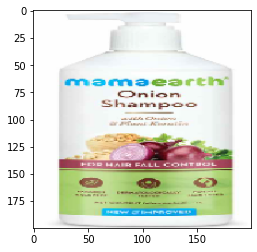

In [36]:
plt.imshow(test_image)
if result[0][0]==1:
    print('It is 8x shampoo product')
elif result[0][1]==1:
    print('It is Dove product')
elif result[0][2]==1:
    print('It is Head & shoulder product')
elif result[0][3]==1:
    print("It is L'oreal product")
elif result[0][4]==1:
    print('It is Mamaearth product')
elif result[0][5]==1:
    print('It is P&G')
elif result[0][6]==1:
    print('It is Saslic product')
elif result[0][7]==1:
    print('It is Wow skincare product' )
